In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
data=pd.read_csv("Base_unificada_v6.csv")

/Users/javierserranomolina/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (12,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,98,134,143,146) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data

,ID,cunicah,np,age_12,sex_12,c38_12,c40a_12,c40b_12,c40c_12,c47_12,...,GRIP_18,ANOREXIA_18,EXERCISE_18,FRAILTY_12,FRAILTY_15,FRAILTY_18,VALID,DISPOSITIVO_12,DISPOSITIVO_15,DISPOSITIVO_18
0,3.05,3,11,41,2,1,,2,,2,...,0,0,1,.0571428571428571,.0571428571428571,.2,3,0,0,0
1,6.00,6,10,64,2,5,,2,,,...,0,0,1,,.142857142857143,.171428571428571,4,0,0,0
2,10.50,10,20,38,2,,,1,2,1,...,1,0,0,,.228571428571429,,2,0,0,0
3,21.00,21,10,71,2,2,,2,,,...,,,,,,,4,,0,1
4,22.50,22,20,53,1,1,,2,,,...,0,0,0,0,,,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11172,2474.00,2474,10,79,2,2,,2,,1,...,1,1,1,0.685714,.742857142857143,.8,1,0,3,
11173,2668.00,2668,10,80,2,3,,2,,1,...,1,1,1,0.685714,.428571428571429,.6,1,1,3,3
11174,3414.00,3414,10,71,2,3,,2,,2,...,1,0,1,0.685714,.685714285714286,,4,3,3,3
11175,9693.00,9693,10,64,2,2,,2,,1,...,1,0,1,0.685714,.714285714285714,,4,1,1,1


In [4]:
len(data)

11177

In [8]:
data_f = data[(data["FRAILTY_12"] != ' ') & (data["FRAILTY_15"] != ' ') & (data["FRAILTY_18"] != ' ') & (data['age_12']>=60)]

In [6]:
data_f = data[(data["FRAILTY_12"] != ' ') & (data["FRAILTY_15"] != ' ') & (data["FRAILTY_18"] != ' ') ]

In [9]:
data_f.columns

Index(['ID', 'cunicah', 'np', 'age_12', 'sex_12', 'c38_12', 'c40a_12',
       'c40b_12', 'c40c_12', 'c47_12',
       ...
       'GRIP_18', 'ANOREXIA_18', 'EXERCISE_18', 'FRAILTY_12', 'FRAILTY_15',
       'FRAILTY_18', 'VALID', 'DISPOSITIVO_12', 'DISPOSITIVO_15',
       'DISPOSITIVO_18'],
      dtype='object', length=150)

In [10]:
A=np.array([data_f["FRAILTY_12"].astype(float),data_f["FRAILTY_15"].astype(float),data_f["FRAILTY_18"].astype(float)])
B=A.transpose()

In [11]:
B

array([[0.        , 0.05714286, 0.02857143],
       [0.        , 0.        , 0.02857143],
       [0.        , 0.02857143, 0.02857143],
       ...,
       [0.6       , 0.37142857, 0.25714286],
       [0.68571429, 0.74285714, 0.8       ],
       [0.68571429, 0.42857143, 0.6       ]])

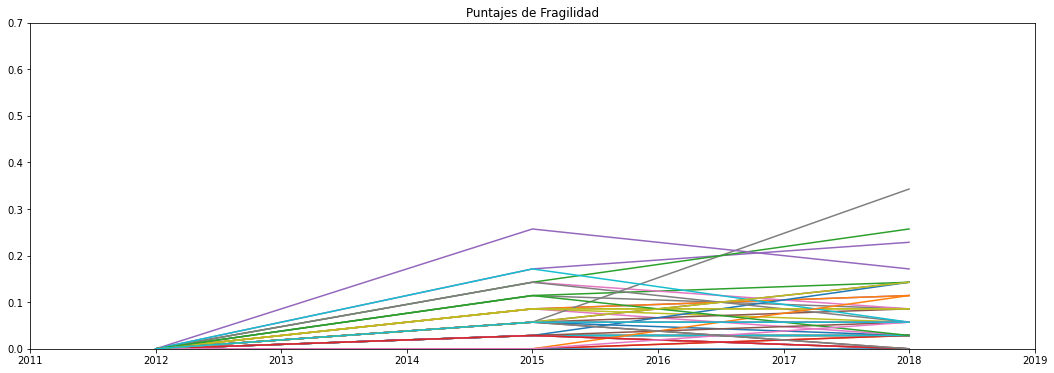

In [12]:
plt.figure(figsize=(18,6))
for i in range(0,40):
    plt.plot([2012,2015,2018],A.transpose()[i])
plt.xlim([2011,2019])
plt.ylim([0,0.7])
plt.title("Puntajes de Fragilidad")
plt.show;

## Observaciones:
* 8 formas principales: Tipo V, con pendiente constante, agresivas al inicio, agresivas al final.
* Cada forma tiene su "inversa" (V invertida, etc).

## Cálculo de pendientes

In [13]:
slope=np.zeros([len(data_f),2])
for i in range(len(data_f)):
    slope[i,0]=B[i,1]-B[i,0]
    slope[i,1]=B[i,2]-B[i,1]

In [14]:
slope

array([[ 0.05714286, -0.02857143],
       [ 0.        ,  0.02857143],
       [ 0.02857143,  0.        ],
       ...,
       [-0.22857143, -0.11428571],
       [ 0.05714286,  0.05714286],
       [-0.25714286,  0.17142857]])

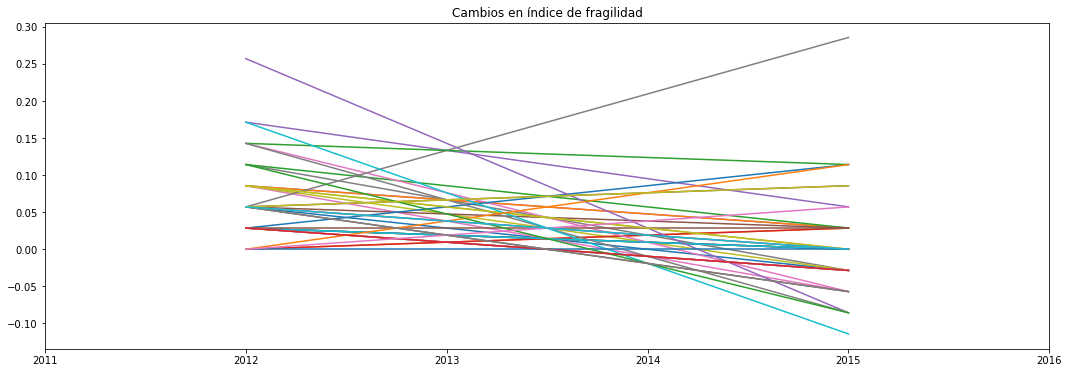

In [15]:
plt.figure(figsize=(18,6))
for i in range(0,40):
    plt.plot([2012,2015],slope[i])
plt.xlim([2011,2016])
#plt.ylim([0,0.7])
plt.title("Cambios en índice de fragilidad")
plt.show;

In [16]:
th=0.05
classif=np.zeros(len(B))
for i in range(0,len(B)):
    if slope[i,0]>th:
        if slope[i,1]>th:
            classif[i]=1
        elif slope[i,1]>=-1*th:
            classif[i]=2
        elif slope[i,1]<-1*th:
            classif[i]=3
    elif slope[i,0]>=-1*th:
        if slope[i,1]>th:
            classif[i]=4
        elif slope[i,1]>=-1*th:
            classif[i]=5
        elif slope[i,1]<-1*th:
            classif[i]=6
    elif slope[i,0]<-1*th:
        if slope[i,1]>th:
            classif[i]=7
        elif slope[i,1]>=-1*th:
            classif[i]=8
        elif slope[i,1]<-1*th:
            classif[i]=9

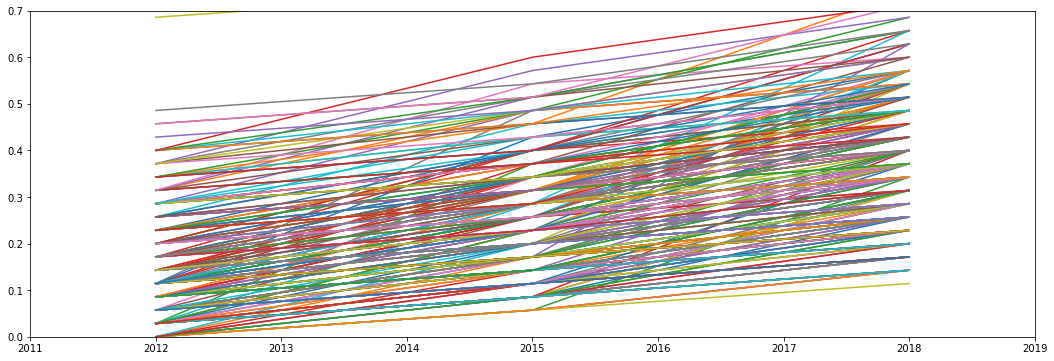

In [17]:
plt.figure(figsize=(18,6))
clase=1
for i in range(0,len(np.where(classif==clase)[0])):
    plt.plot([2012,2015,2018],B[np.where(classif==clase)[0][i]])
plt.xlim([2011,2019])
plt.ylim([0,0.7])
plt.show;

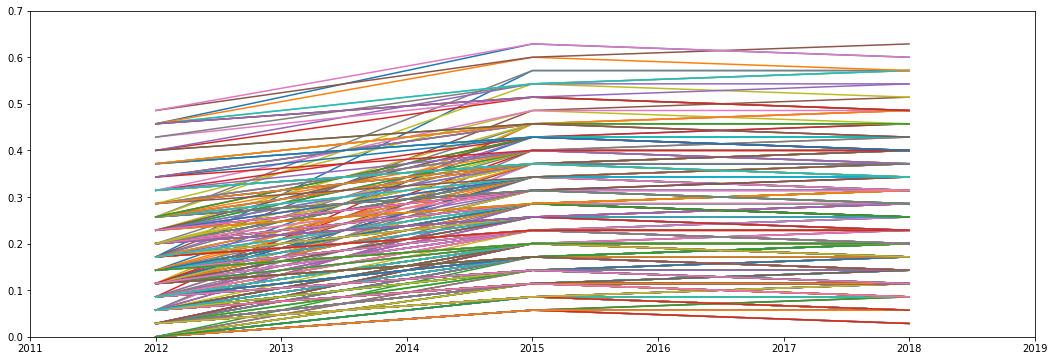

In [18]:
plt.figure(figsize=(18,6))
clase=2
for i in range(0,len(np.where(classif==clase)[0])):
    plt.plot([2012,2015,2018],B[np.where(classif==clase)[0][i]])
plt.xlim([2011,2019])
plt.ylim([0,0.7])
plt.show;

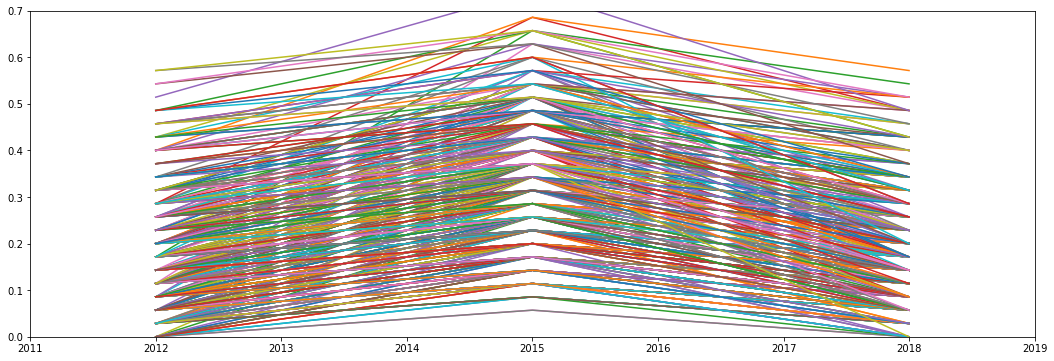

In [19]:
plt.figure(figsize=(18,6))
clase=3
for i in range(0,len(np.where(classif==clase)[0])):
    plt.plot([2012,2015,2018],B[np.where(classif==clase)[0][i]])
plt.xlim([2011,2019])
plt.ylim([0,0.7])
plt.show;

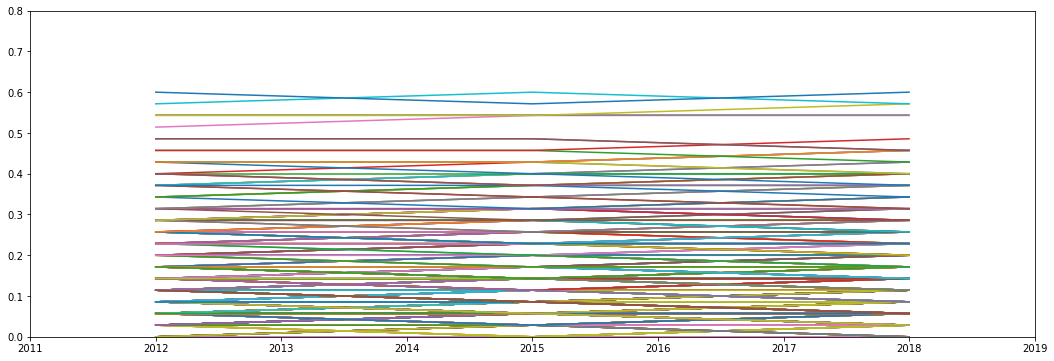

In [20]:
plt.figure(figsize=(18,6))
clase=5
for i in range(0,len(np.where(classif==clase)[0])):
    plt.plot([2012,2015,2018],B[np.where(classif==clase)[0][i]])
plt.xlim([2011,2019])
plt.ylim([0,0.8])
plt.show;

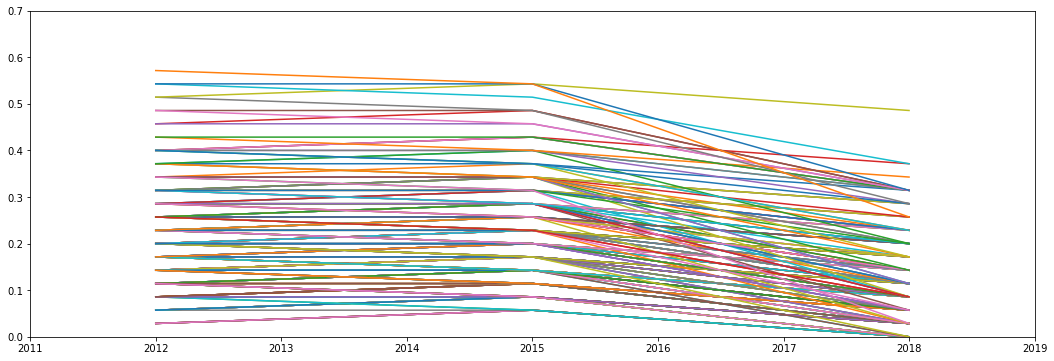

In [21]:
plt.figure(figsize=(18,6))
clase=6
for i in range(0,len(np.where(classif==clase)[0])):
    plt.plot([2012,2015,2018],B[np.where(classif==clase)[0][i]])
plt.xlim([2011,2019])
plt.ylim([0,0.7])
plt.show;

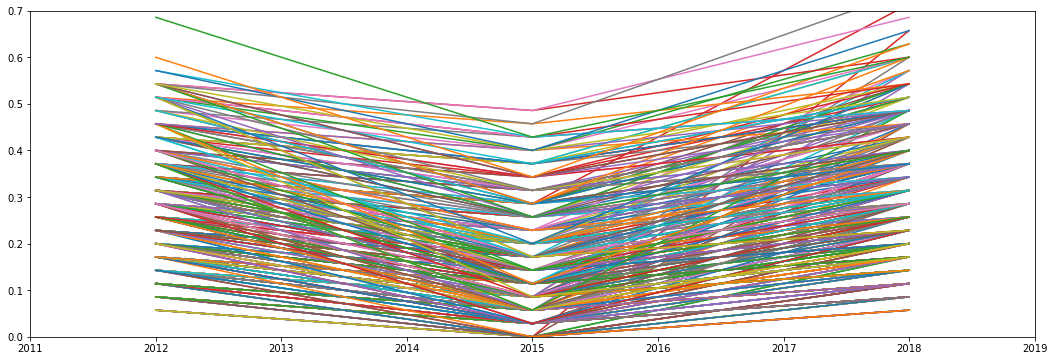

In [22]:
plt.figure(figsize=(18,6))
clase=7
for i in range(0,len(np.where(classif==clase)[0])):
    plt.plot([2012,2015,2018],B[np.where(classif==clase)[0][i]])
plt.xlim([2011,2019])
plt.ylim([0,0.7])
plt.show;

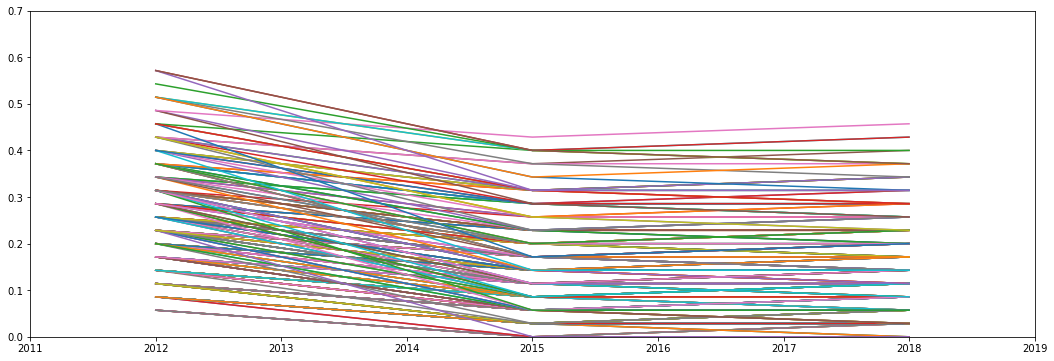

In [23]:
plt.figure(figsize=(18,6))
clase=8
for i in range(0,len(np.where(classif==clase)[0])):
    plt.plot([2012,2015,2018],B[np.where(classif==clase)[0][i]])
plt.xlim([2011,2019])
plt.ylim([0,0.7])
plt.show;

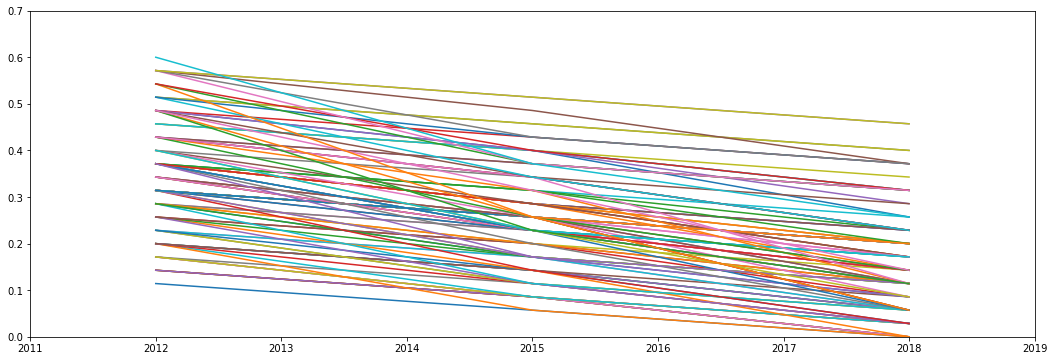

In [24]:
plt.figure(figsize=(18,6))
clase=9
for i in range(0,len(np.where(classif==clase)[0])):
    plt.plot([2012,2015,2018],B[np.where(classif==clase)[0][i]])
plt.xlim([2011,2019])
plt.ylim([0,0.7])
plt.show;

In [25]:
hist_clases=np.array([len(np.where(classif==0)[0]),len(np.where(classif==1)[0]),len(np.where(classif==2)[0]),len(np.where(classif==3)[0]),len(np.where(classif==4)[0]),len(np.where(classif==5)[0]),len(np.where(classif==6)[0]),len(np.where(classif==7)[0]),len(np.where(classif==8)[0]),len(np.where(classif==9)[0])])

In [26]:
labels=["Empeoran cte", "Empeoran y se mantienen", "V invertida","Cte y empeoran", "Cte", "Cte y mejoran", "V", "Mejoran y se mantienen", "Mejoran contantemente"]

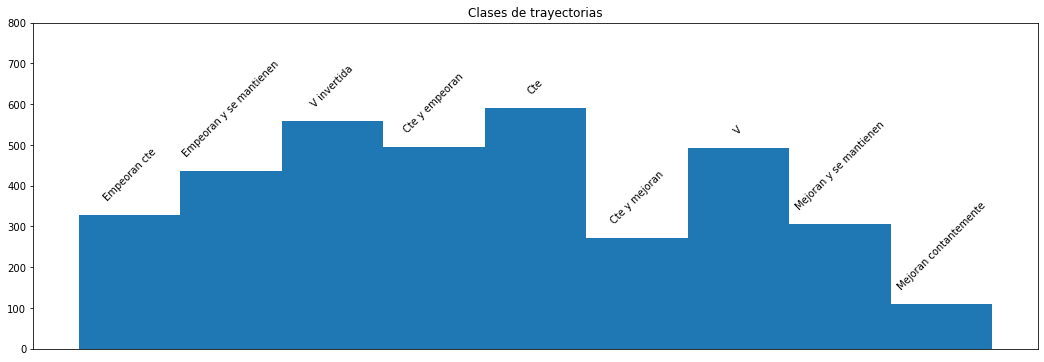

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(18,6))
ax.hist(classif, bins=9)
ax.set_title("Clases de trayectorias")
ax.tick_params(axis='x',labelbottom=False, bottom=False)
ax.set_ylim([0,800])

rects = ax.patches
  
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height+30, label,
            ha='center', va='bottom', rotation=45)
plt.show;

## Observaciones:
* La clase más común es la que no presenta cambios drásticos. 
* La siguiente más común es la que presenta una fragilidad alta en el periodo central. Esto puede ser debido a un incidente ocurrido entre el 2012 y el 2015 que generó un cambio drástico en el índice de fragilidad. Este fenómeno se logró superar y los sujetos están en un proceso de recuperación. Esto nos habla de la gravedad del incidente. Se espera que los parámetros elegidos nos ayuden a estimar la gravedad del incidente y si un sujeto se puede recuperar o no. 
* El tercer caso más común fueron las personas que tuvieron el mismo incidente del caso anterior pero entre los años 2012 y 2015. Aún no sabemos cuantos de ellos se lograron recuperar. 
* El cuarto caso más común es en el que la fragilidad disminuye y después vuelve a subir. Esto notiene mucho sentido. Se tendría que estudiar más este grupo para encontrar la razón de este comportamiento. 
* Los sujetos que mejoran en algún periodo son de los menos comunes, que es de esperarse ya es poco probable que perteneciendo a un grupo vulnerable, nunca hayan presentado alguna complicación. 
* Curiosamente otro de los grupos menos comunes es el de las personas que tienen un deterioro constante. Este grupo puede ser de aquellas personas que tienen una enfermedad degenerativa o no curable(como la diabetes) o que presentan una condición que los vuelve doblemente vulnerables(como usar un dispositivo de mobilidad o estar en un ambiete de poca estimulación). 

In [30]:
len(np.where(classif==5)[0])

591

In [31]:
data_f["Classif"]=classif

/var/folders/xc/z05tb2yj5_s30q5tlm9f2xs40000gn/T/ipykernel_56226/56033418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f["Classif"]=classif


In [32]:
data_f.columns[:15]

Index(['ID', 'cunicah', 'np', 'age_12', 'sex_12', 'c38_12', 'c40a_12',
       'c40b_12', 'c40c_12', 'c47_12', 'd3_12', 'd4_12', 'i30_12',
       'fallecido_15', 'age_15'],
      dtype='object')

In [33]:
clase=0
data_f.loc[np.where(classif==clase)[0]]["DISPOSITIVO_12"]

Series([], Name: DISPOSITIVO_12, dtype: object)

In [160]:
X1=np.array([data_f["age_12"],
            data_f["age_15"],
            data_f["age_18"],
            data_f["sex_12"].astype(float),
            data_f["c38_12"],
            data_f["c38_15"],
            data_f["c38_18"],
            data_f['c40c_12'],
            data_f['c40c_12'],
            data_f['c40b_18'],
            data_f['c47_12'],
            data_f['c47_15'],
            data_f['c47_18'],
            data_f['d3_12'],
            data_f['d4_12'],
            data_f['d4_15'],
            data_f['d4_18'],
            data_f["i30_12"],
            data_f["i30_15"],
            data_f["i30_18"],
            data_f['DISPOSITIVO_12'],
            data_f['DISPOSITIVO_15'],
            data_f['DISPOSITIVO_18'],
            data_f["FRAILTY_12"],
            data_f["FRAILTY_15"],
            data_f['FRAILTY_18']])
X=np.zeros(np.shape(X1))

In [228]:
for i in range(0,len(X1)):
    for j in range(0,len(X1[i])):
        if X1[i,j]==X1[4,1]:
            if i==4 or i==5 or i==6:
                X[i,j]=0
            elif i==10 or i==11 or i==12:
                X[i,j]=2
            elif i==7 or i==8 or i==13:
                X[i,j]=1
            else:
                X[i,j]=np.nan
        else:
            if i==0 or i==1 or i==2:
                if X1[i,j]>150:
                    X[i,j]=np.nan
                else:
                    X[i,j]=float(X1[i,j])
            elif i==4 or i==5 or i==6:
                if X1[i,j]=='88' or X1[i,j]=='99':
                    X[i,j]=np.nan
                elif float(X1[i,j])>0:
                    X[i,j]=1
                else:
                    X[i,j]=0
            elif i==7 or i==8 or i==9:
                if X1[i,j]=='9' or X1[i,j]==9 or X1[i,j]==8 or X[i,j]=='8':
                    X[i,j]=np.nan
                elif int(X1[i,j])>1:
                    X[i,j]=2
                else:
                    X[i,j]=float(X1[i,j])
            elif i==10 or i==11 or i==12:
                if float(X1[i,j])>2:
                    X[i,j]=np.nan
                else:
                    X[i,j]=float(X1[i,j])
            elif i==14 or i==15 or i==16:
                if float(X1[i,j])>240:
                    X[i,j]=np.nan
                elif float(X1[i,j])>0:
                    X[i,j]=1
                elif float(X1[i,j])==0:
                    X[i,j]=0
                else:
                    X[i,j]=float(X1[i,j])
            elif i==17 or i==18 or i==19:
                if X1[i,j]=='8' or X1[i,j]=='9' or X1[i,j]==8 or X1[i,j]==9:
                    X[i,j]=np.nan
                else:
                    X[i,j]=float(X1[i,j])
            else:
                X[i,j]=float(X1[i,j])

In [229]:
Y=data_f["Classif"]

In [230]:
contador=0
for i in range(0,len(X[0])):
    if X[0,i]<60:
        contador+=1

In [231]:
contador

0

In [232]:
len(X[0])

3593

### Filtro de edad
Sujetos después de filtro de edad: 3593. 

Sujetos antes del filtro: 5998

In [233]:
for i in range(0,len(X)):
    print("Var"+str(i)+ ": Min="+str(min(X[i]))+" Max="+str(max(X[i])))

Var0: Min=60.0 Max=102.0
Var1: Min=47.0 Max=96.0
Var2: Min=51.0 Max=99.0
Var3: Min=1.0 Max=2.0
Var4: Min=0.0 Max=1.0
Var5: Min=0.0 Max=1.0
Var6: Min=0.0 Max=1.0
Var7: Min=1.0 Max=2.0
Var8: Min=1.0 Max=2.0
Var9: Min=1.0 Max=2.0
Var10: Min=1.0 Max=2.0
Var11: Min=1.0 Max=2.0
Var12: Min=1.0 Max=2.0
Var13: Min=1.0 Max=2.0
Var14: Min=0.0 Max=1.0
Var15: Min=0.0 Max=1.0
Var16: Min=0.0 Max=1.0
Var17: Min=1.0 Max=5.0
Var18: Min=1.0 Max=5.0
Var19: Min=1.0 Max=5.0
Var20: Min=0.0 Max=3.0
Var21: Min=0.0 Max=3.0
Var22: Min=0.0 Max=3.0
Var23: Min=0.0 Max=0.685714285714286
Var24: Min=0.0 Max=0.742857142857143
Var25: Min=0.0 Max=0.8


In [234]:
cross=np.zeros([30,9])

In [235]:
for i in range(1,10):
    for j in range(3,len(X)-3):
        cross[j,i-1]=(np.nanmean(X[j,classif==i])-min(X[j]))*100/(max(X[j])-min(X[j]))
    cross[0,i-1]=np.nanmean(X[0,classif==i])
    cross[1,i-1]=np.nanmean(X[1,classif==i])
    cross[2,i-1]=np.nanmean(X[2,classif==i])
    
    cross[23,i-1]=np.nanmean(X[-3,classif==i])*100
    cross[24,i-1]=np.nanmean(X[-2,classif==i])*100
    cross[25,i-1]=np.nanmean(X[-1,classif==i])*100
    #Sex(% of women)
#    cross[3,i-1]=np.nanmean(X[3,classif==i])*100
    
    #Falls
#    cross[4,i-1]=np.nanmean(X[4,classif==i])*100
#    cross[5,i-1]=np.nanmean(X[5,classif==i])*100
#    cross[6,i-1]=np.nanmean(X[6,classif==i])*100
    
    #Fractures
#    cross[7,i-1]=np.nanmean(X[7,classif==i])*100
#    cross[8,i-1]=np.nanmean(X[8,classif==i])*100
#    cross[9,i-1]=np.nanmean(X[9,classif==i])*100
    
    
#    cross[2,i-1]=(np.nanmean(X[1,classif==i])-1)*100
#    cross[3,i-1]=np.nanstd(X[1,classif==i])*100
    
#    cross[4,i-1]=np.nanmean(X[2,classif==i])*10
#    cross[5,i-1]=np.nanstd(X[2,classif==i])
    
#    cross[6,i-1]=np.nanmean(X[3,classif==i])*10
#    cross[7,i-1]=np.nanstd(X[3,classif==i])*10
    
#    cross[8,i-1]=(2-np.nanmean(X[4,classif==i]))*100
#    cross[9,i-1]=np.nanstd(X[4,classif==i])*100


## Variables:

0. Age12: int
1. Age15: int
2. Age18: int
3. Sex: 1=Male, 2=Female
4. Falls12: # of falls in the last 2 years
5. Falls15: # of falls in the last 2 years
6. Falls18: # of falls in the last 2 years
7. Fractures in the last 2 years 2012: 1=yes, 2=no
8. Fractures in the last 2 years 2015: 1=yes, 2=no
9. Fractures in the last 2 years 2018: 1=yes, 2=no
10. Pain12: 1=yes, 2=no
11. Pain15: 1=yes, 2=no
12. Pain18: 1=yes, 2=no
13. Medical insurance: 1=yes, 2= no
14. Hospitalization12 in the last year: # of stays
15. Hospitalization15 in the last year: # of stays
16. Hospitalization18 in the last year: # of stays
17. Self-reported economic situation 2012: 1: Excelent, 2=Very good, 3=good, 4=Fair, 5=Poor
18. Self-reported economic situation 2015: 1: Excelent, 2=Very good, 3=good, 4=Fair, 5=Poor
19. Self-reported economic situation 2018: 1: Excelent, 2=Very good, 3=good, 4=Fair, 5=Poor
20. Mobility device 2012: 0: None, 1=Staff, 2=Walker, 3:Wheel chair
21. Mobility device 2015: 0: None, 1=Staff, 2=Walker, 3:Wheel chair
22. Mobility device 2018: 0: None, 1=Staff, 2=Walker, 3:Wheel chair
23. Frailty12
24. Frailty15
25. Frailty18

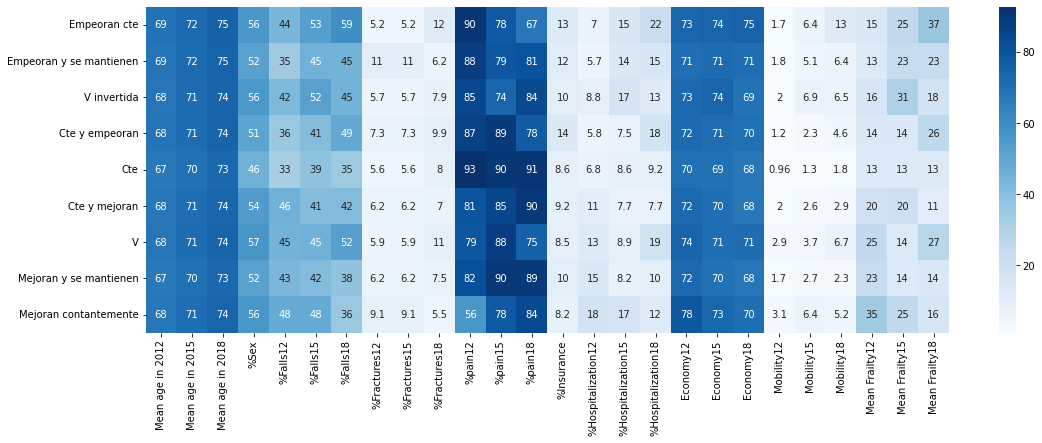

In [236]:
plt.figure(figsize=(18,6))
cross_df=pd.DataFrame({'Mean age in 2012':cross[0],'Mean age in 2015':cross[1],'Mean age in 2018':cross[2], '%Sex':cross[3], '%Falls12': cross[4],
                       '%Falls15': cross[5],'%Falls18': cross[6],'%Fractures12':cross[7], '%Fractures15':cross[8], '%Fractures18':cross[9], 
                       '%pain12':cross[10],'%pain15':cross[11],'%pain18':cross[12], '%Insurance':cross[13], '%Hospitalization12': cross[14],
                       '%Hospitalization15': cross[15],'%Hospitalization18': cross[16],'Economy12':cross[17],'Economy15':cross[18],'Economy18':cross[19],
                      'Mobility12':cross[20], 'Mobility15':cross[21],'Mobility18':cross[22], 'Mean Frailty12': cross[23],'Mean Frailty15': cross[24],'Mean Frailty18': cross[25]},
                     index=labels)

sns.heatmap(cross_df, annot=True, cmap="Blues")
plt.show()

In [237]:
print(np.nanmean(X[9,classif==1]))
print(np.nanstd(X[9,classif==1]))

1.121580547112462
0.3268007308380696


In [257]:
defs=['Age12','Age15','Age18','Sex','Falls12','Falls15','Falls18','Fractures12','Fractures15','Fractures18',
      'Pain12','Pain15','Pain18','Insurance','Hospitalization12','Hospitalization15','Hospitalization18','Economy12',
      'Economy15','Economy18','Mobility12','Mobility15','Mobility18','Frailty12','Frailty15','Frailty18']

## Observaciones:

* Grupo de constante deterioro:
    - Particularmente de edad avanzada
    - Muy poco dolor
    - Muchas caídas
* Grupo constante:
    - Alta hospitalización
    - Bajo dolor
    - Alta mobilidad (no suelen usar dispositivo)
    - Baja fragilidad
    - Excelente economía
    - Alta concentración de hombres
    
* Grupo V (mejoran y luego empeoran):
    - 62% son mujeres
    - Baja taza de seguro médico
    - Baja mobilidad (suelen hacer uso de un dispositivo)
    - Alta fragilidad
* Grupo Mejoran y se mantienen:
    - Grupo más joven
    -
* Grupo de constante mejora:
    - 66% son mujeres
    - Muchas caidas
    - Mucho dolor
    - Economía relativamente pobre
    - Alta fragilidad
    - Alto uso de dispositivo
   

In [252]:
np.shape(Y.to_numpy().reshape(len(Y),1))

(3593, 1)

In [258]:
np.shape(defs)

(26,)

# Clusters por k-means

In [280]:
data_km=np.append(X.transpose(),Y.to_numpy().reshape(len(Y),1),axis=1)

In [281]:
data_km=pd.DataFrame(columns=defs)

In [282]:
for i in range(0,len(X.transpose())):
    data_km.loc[i]=X.transpose()[i]

In [283]:
data_km['Classif']=classif

In [288]:
np.where(data_km['Age12'].isna()==True)

(array([ 356,  754,  841, 1130, 2174, 3161]),)

In [290]:
data_km['Age12'][350:360]

350    62.0
351    66.0
352    61.0
353    68.0
354    62.0
355    61.0
356     NaN
357    65.0
358    62.0
359    72.0
Name: Age12, dtype: float64

In [286]:
for i in range(0,len(X)):
    print(data_km[defs[i]].isna().sum())

6
0
0
0
6
8
15
0
0
2
1
1
0
0
1
2
5
4
2
2
7
5
14
0
0
0


In [291]:
data_nn=data_km.dropna()

In [292]:
np.shape(data_nn)

(3515, 27)

In [293]:
scaled_df = StandardScaler().fit_transform(data_nn.iloc[:,:10])

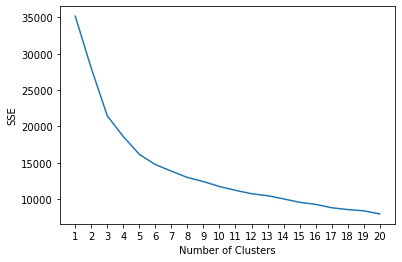

In [294]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 21), sse)
plt.xticks(range(1, 21))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [295]:
kmeans = KMeans(init="random", n_clusters=5, n_init=10, random_state=1)

In [296]:
kmeans.fit(scaled_df)

KMeans(init='random', n_clusters=5, random_state=1)

In [297]:
kmeans.labels_

array([4, 0, 2, ..., 1, 0, 1], dtype=int32)

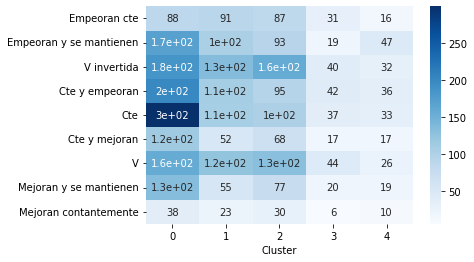

In [298]:
confusion_matrix = pd.crosstab(data_nn['Classif'].astype(int), kmeans.labels_, rownames=['Clase'], colnames=['Cluster'])
confusion_matrix.index=labels

sns.heatmap(confusion_matrix, annot=True, cmap="Blues")
plt.show()

# Decision tree

In [299]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_text

In [306]:
data_nn.columns

Index(['Age12', 'Age15', 'Age18', 'Sex', 'Falls12', 'Falls15', 'Falls18',
       'Fractures12', 'Fractures15', 'Fractures18', 'Pain12', 'Pain15',
       'Pain18', 'Insurance', 'Hospitalization12', 'Hospitalization15',
       'Hospitalization18', 'Economy12', 'Economy15', 'Economy18',
       'Mobility12', 'Mobility15', 'Mobility18', 'Frailty12', 'Frailty15',
       'Frailty18', 'Classif'],
      dtype='object')

In [307]:
X_train, test_x, y_train, test_y = train_test_split(data_nn.iloc[:,:24],data_nn['Classif'],

                                                 test_size = 0.2,

                                                 random_state = 42)

In [308]:
clf = DecisionTreeClassifier(max_depth =8, random_state = 42)

clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=42)

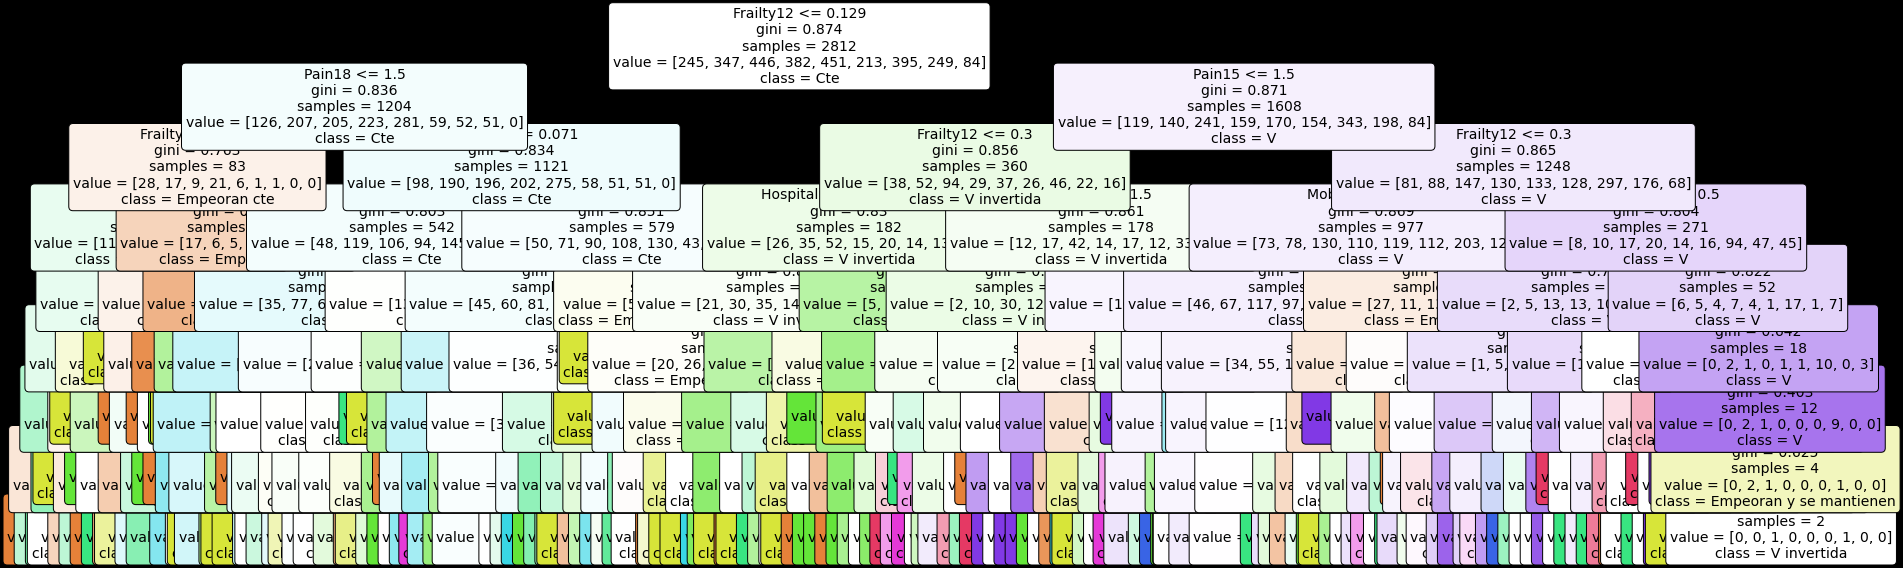

In [309]:
plt.figure(figsize=(30,10), facecolor ='k')

a = tree.plot_tree(clf,
                   feature_names = defs,
                   class_names = labels,
                   rounded = True,
                   filled = True,
                   fontsize=14)
plt.show()

In [310]:
tree_rules = export_text(clf,

                        feature_names = list(defs[0:24]))

print(tree_rules)

|--- Frailty12 <= 0.13
|   |--- Pain18 <= 1.50
|   |   |--- Frailty12 <= 0.10
|   |   |   |--- Frailty12 <= 0.01
|   |   |   |   |--- class: 3.0
|   |   |   |--- Frailty12 >  0.01
|   |   |   |   |--- Fractures18 <= 1.50
|   |   |   |   |   |--- Age18 <= 70.50
|   |   |   |   |   |   |--- Age12 <= 60.50
|   |   |   |   |   |   |   |--- Frailty12 <= 0.04
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |--- Frailty12 >  0.04
|   |   |   |   |   |   |   |   |--- class: 4.0
|   |   |   |   |   |   |--- Age12 >  60.50
|   |   |   |   |   |   |   |--- Insurance <= 1.50
|   |   |   |   |   |   |   |   |--- class: 4.0
|   |   |   |   |   |   |   |--- Insurance >  1.50
|   |   |   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |   |--- Age18 >  70.50
|   |   |   |   |   |   |--- Pain15 <= 1.50
|   |   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |   |   |--- Pain15 >  1.50
|   |   |   |   |   |   |   |--- Age15 <= 72.50
|   |   |   |   |   |   |   |   |--

In [311]:
test_pred_decision_tree = clf.predict(test_x)

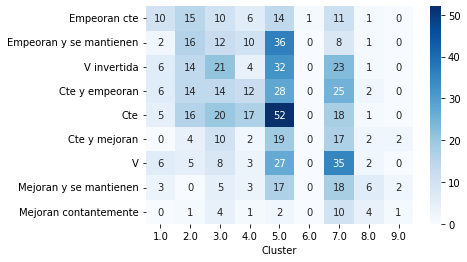

In [312]:
confusion_matrix = pd.crosstab(test_y, test_pred_decision_tree, rownames=['Clase'], colnames=['Cluster'])
confusion_matrix.index=labels

sns.heatmap(confusion_matrix, annot=True, cmap="Blues")
plt.show()

In [313]:
pred_train = clf.predict(X_train)

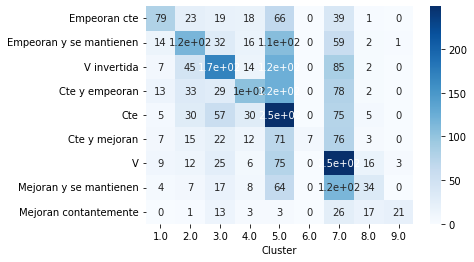

In [314]:
confusion_matrix = pd.crosstab(y_train, pred_train, rownames=['Clase'], colnames=['Cluster'])
confusion_matrix.index=labels

sns.heatmap(confusion_matrix, annot=True, cmap="Blues")
plt.show()

# Birch

In [315]:
from sklearn.cluster import Birch

In [316]:
model = Birch(threshold=0.01, n_clusters=9)

In [322]:
model.fit(data_nn.iloc[:,:24])

GaussianMixture(n_components=9)

In [323]:
yhat = model.predict(data_nn.iloc[:,:24])

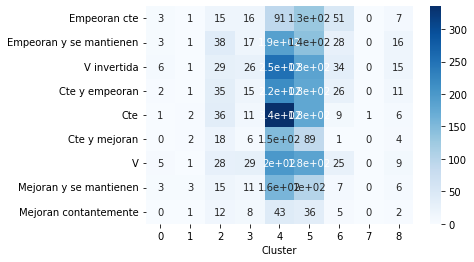

In [325]:
confusion_matrix = pd.crosstab(data_nn['Classif'], yhat, rownames=['Clase'], colnames=['Cluster'])
confusion_matrix.index=labels

sns.heatmap(confusion_matrix, annot=True, cmap="Blues")
plt.show()

# Gaussian

In [326]:
from sklearn.mixture import GaussianMixture

In [328]:
model = GaussianMixture(n_components=23)

In [329]:
model.fit(data_nn.iloc[:,:24])

GaussianMixture(n_components=23)

In [331]:
yhat = model.predict(data_nn.iloc[:,:24])

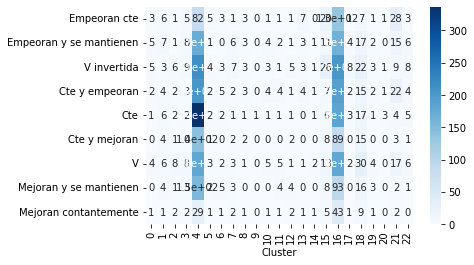

In [332]:
confusion_matrix = pd.crosstab(data_nn['Classif'], yhat, rownames=['Clase'], colnames=['Cluster'])
confusion_matrix.index=labels

sns.heatmap(confusion_matrix, annot=True, cmap="Blues")
plt.show()

# Support Vector Machine

In [333]:
from sklearn.svm import SVC

In [ ]:
clf = SVC(kernel='poly', degree=4, gamma='auto', C=1.0)
clf.fit(X_train, y_train)

In [335]:
pred_train = clf.predict(X_train)

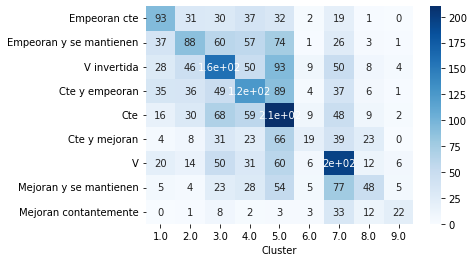

In [340]:
confusion_matrix = pd.crosstab(y_train, pred_train, rownames=['Clase'], colnames=['Cluster'])
confusion_matrix.index=labels

sns.heatmap(confusion_matrix, annot=True, cmap="Blues")
plt.savefig("Confusion_SVC_d3_train.png")
plt.show()

In [337]:
pred_test = clf.predict(test_x)

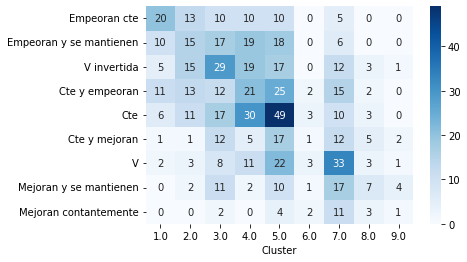

In [341]:
confusion_matrix = pd.crosstab(test_y, pred_test, rownames=['Clase'], colnames=['Cluster'])
confusion_matrix.index=labels

sns.heatmap(confusion_matrix, annot=True, cmap="Blues")
plt.savefig("Confusion_SVC_d3_test.png")
plt.show()